<h1 style="background-color: #0077b6; padding: 12px;">Capstone Project on Travel Insurance Predictions
</h1>

**A tours and  Travels company wants to know if its clients might be interested in purchasing travel insurance in the future based on their database history. The company has provided information for 1097 of its previous customers. we need to develop an intelligent model that can determine, from a given set of variables, if a consumer is likely to purchase the travel insurance package in future. These factors include the client's age, occupation, educational background, annual income, family size, status as a frequent flier, medical sickness, history of travel abroad, and how many times they have previously purchased travel insurance.**

**IMPORTING IMPORTANT LIBRARIES**

In [1]:
import pandas as pd

# Data Visualization
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split
!pip install xgboost

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Evauation Metrics
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

import warnings
warnings.simplefilter("ignore")

**DOWNLOADING THE DATA**

In [2]:
# Reading the dataset
df = pd.read_excel(r"C:\Users\shaik\Downloads\8.TravelInsurancePrediction 1.xlsx")

In [3]:
# The head() function views the first five rows of the Dataframe
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
# The tail() function views the last five rows of the Dataframe
df.tail()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


**EXPLORATIVE DATA ANALYSIS AND PREPROCESSING**

In [5]:
# The info() function allowed us to determine the information about the data in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [6]:
# The shape function represent numbers of rows and number of columns in the DataFrame
df.shape

(1987, 10)

**Output: There are 1987 rows and 10 columns in the complete dataset**

In [7]:
# The columns function is to access the column names of the DataFrame 
df.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [8]:
# The Drop function is to remove irrelevant columns from the DataFrame
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# Checking the datatypes after dropping irrelevant column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [10]:
# **Statistical Descriptive Analysis of the dataset**

# The describe function provides Descriptive Statistic such as count, mean, standard deviation,
# first quartile, third quartile, min, and max.

# .T (transpose) on the result, it swaps rows and columns, making it easier to read. 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [11]:
# This code will provide descriptive statistics for the categorical (object) variables in the DataFrame 
df.describe(include = object)

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


In [12]:
# The isna() function looks for missing values in the dataframe.
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

**Output: No missing values found in the dataset**

In [13]:
# The nunique() function shows unique value for the complete dataframe.
df.nunique() 

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

**CONVERTING CATEGORICAL DATA TO NUMERICAL DATA**

In [14]:
# Yes : 1 , No : 0
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0})
df['EverTravelledAbroad'] = df['EverTravelledAbroad'].map({'Yes': 1, 'No': 0})
df['GraduateOrNot'] = df['GraduateOrNot'].map({'Yes':1, 'No':0})

# Government Sector : 1, Private Sector/Self Employed : 0
df["Employment Type"] = df["Employment Type"].map({"Government Sector" : 1, "Private Sector/Self Employed" : 0})

In [15]:
# Examining the dataset following the numerical transformation
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


# VISUALIZATION

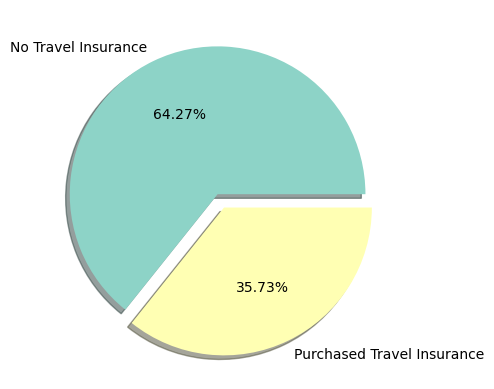

In [16]:
# To visualize number of customers purchased travel insurance and customers that did not purchased travel Insurance package.

values = df['TravelInsurance'].value_counts()
plt.pie(x=df["TravelInsurance"].value_counts(), 
        colors = sns.color_palette("Set3"),
        labels=["No Travel Insurance","Purchased Travel Insurance"], 
        shadow = True, 
        explode = (0, 0.1),
        autopct='%.2f%%',
        )
plt.show()

**Findings: _35.7%_ of people have bought the travel insurance; _64.3%_ of people have not bought the travel insurance.**

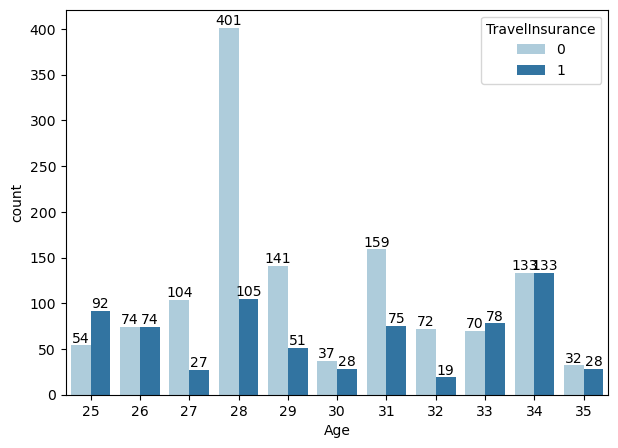

In [17]:
# To visualize Age of customers in correlation with purchased travel Insurance history.

plt.figure(figsize=(7,5))
aa=sns.countplot(data=df, x="Age",hue="TravelInsurance", palette="Paired")
for bars in aa.containers:
    aa.bar_label(bars)

**Findings: Based on the graph, we can conclude that greatest buying age is 34; 
the lowest purchase ages across all age groups are 27, 30, and 32. Maximum age of the applicant is 35 and the minimum is 25 years.**

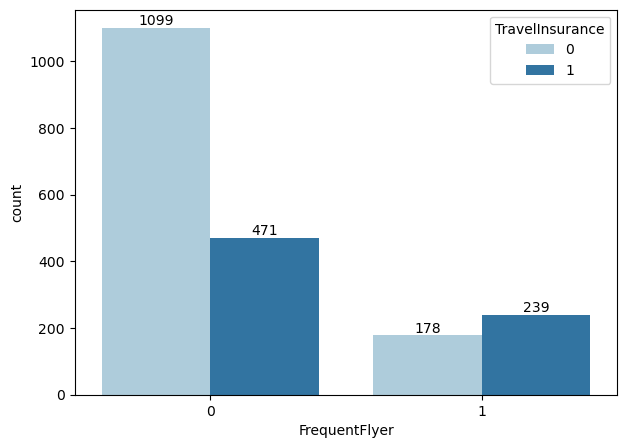

In [18]:
# To visualize Frequent Flyers in correlation with purchased travel Insurance history.

plt.figure(figsize=(7,5))
aa=sns.countplot(data=df, x="FrequentFlyer",hue="TravelInsurance", palette="Paired")
for bars in aa.containers:
    aa.bar_label(bars)

**Findings: Travel insurance is more likely to be purchased by frequent travelers.**

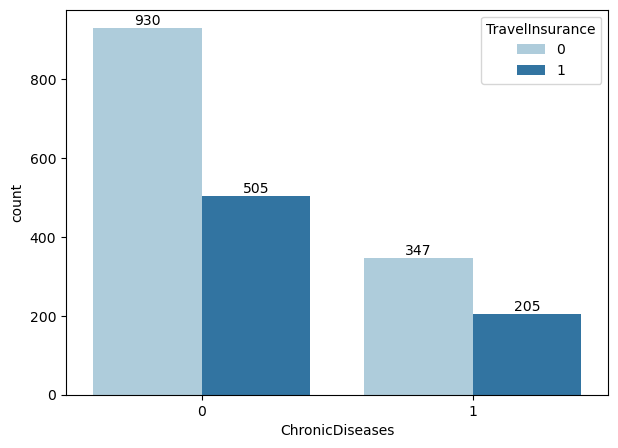

In [19]:
#To visualize customers with chronic diseases in correlation with purchased travel Insurance history.

plt.figure(figsize=(7,5))
aa=sns.countplot(data=df, x="ChronicDiseases",hue="TravelInsurance", palette="Paired")
for bars in aa.containers:
    aa.bar_label(bars)

**Findings: Chronic Diseases doesn't appear to have a significant impact on the business.**

<Figure size 800x1200 with 0 Axes>

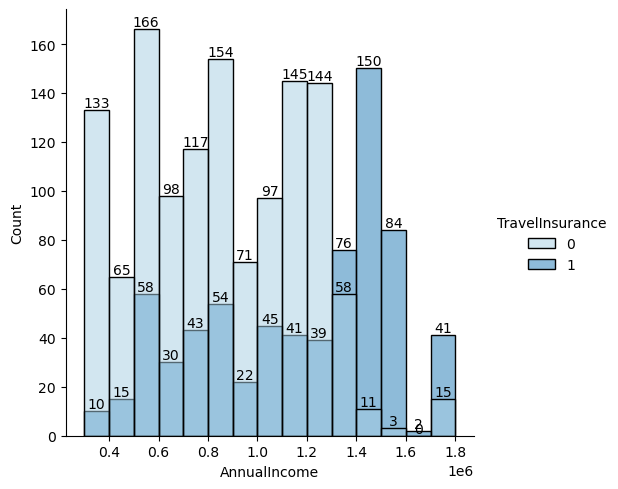

In [20]:
plt.figure(figsize=(8,12))
aa=sns.displot(data=df, x="AnnualIncome",hue="TravelInsurance", palette="Paired")
ax = aa.facet_axis(0, 0)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', label_type='edge')

**Findings: As it can be observed, that there is a high tendency for those earning around ₹ 14,00,000 per year to purchase travel insurance.**

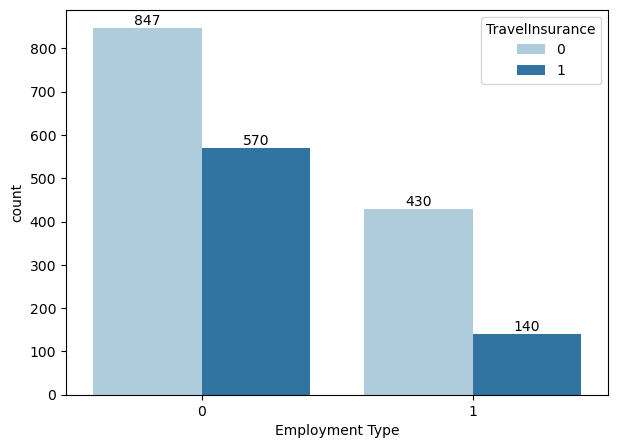

In [21]:
# To visualize Employement type in correlation with purchased travel Insurance history.
plt.figure(figsize=(7,5))
aa=sns.countplot(data=df, x="Employment Type", hue="TravelInsurance", palette="Paired")
for bars in aa.containers:
    aa.bar_label(bars)

**Findings: Customer employed in Private sector tends to purchased more travel Insurance Package**

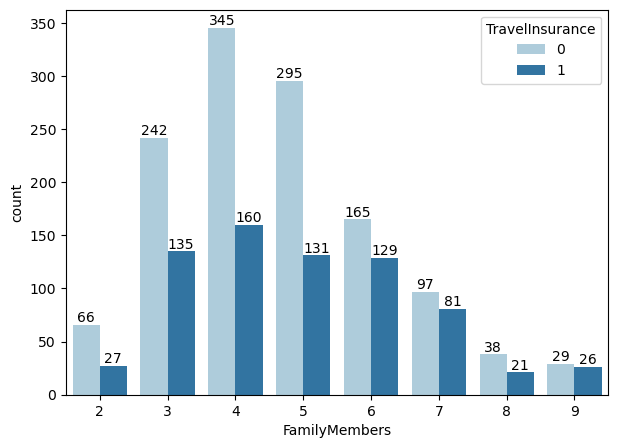

In [22]:
# To visualize count of Family Members in correlation with purchased travel Insurance history.
plt.figure(figsize=(7,5))
aa=sns.countplot(data=df, x='FamilyMembers',hue='TravelInsurance', palette="Paired")
for bars in aa.containers:
    aa.bar_label(bars)

**Findings: Customer with family size of 4 members are the highest purchaser as per the given Data.**

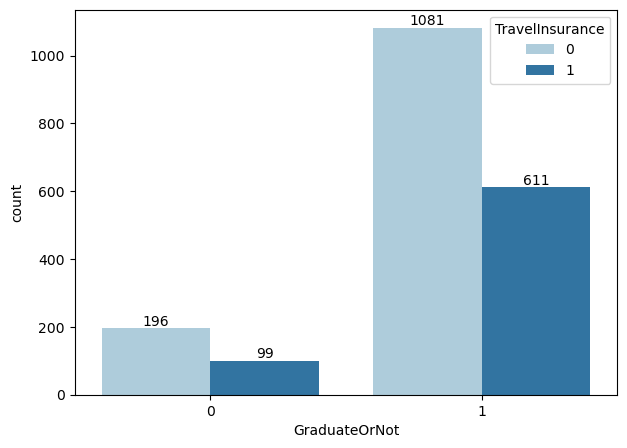

In [23]:
# To visualize Education in correlation with purchased travel Insurance history.
plt.figure(figsize=(7,5))
aa=sns.countplot(data=df, x='GraduateOrNot',hue='TravelInsurance', palette="Paired")
for bars in aa.containers:
    aa.bar_label(bars) 
plt.show()

**Findings: Most of the customers who bought Travel Insurance are Graduate**

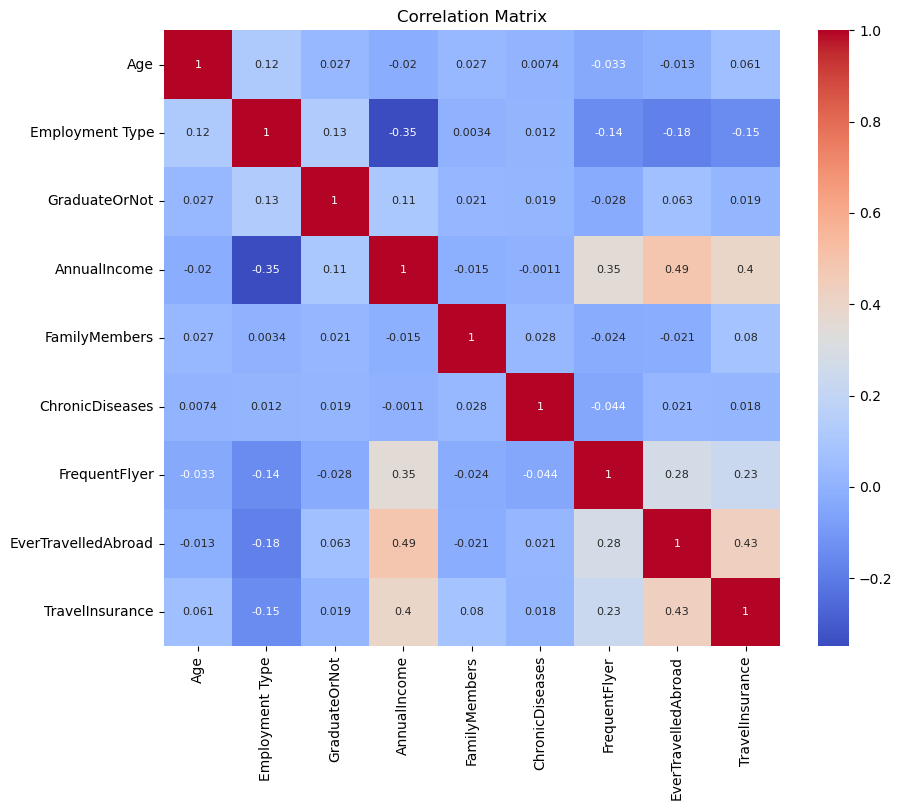

In [24]:
# Plot a heatmap of the correlation of the data
#df["TravelInsurance"]=df["TravelInsurance"].map({"Yes":1,"No":0})

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), square=True, annot=True, cmap="coolwarm", cbar=True, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

#Findings:TravelInsurance with EverTravelledAbroad, AnnualIncome and FrequentFlyer have a strong positive relationship

**Findings: Highest Correlated Features are EverTravelledAbroad, AnnualIncome, FrequentFlyer, EmploymentType and FamilyMembers.**

# SPLITTING THE DATA INTO TRAINING AND TESTING

**With the information provided, we are attempting to forecast if the traveler has travel insurance or not. 
Therefore, the TravelInsurance will be the y label and the remaining data will be the X, or the input data.**

In [25]:
# Split the data into X and y

X = df.drop("TravelInsurance", axis=1)
y = df["TravelInsurance"]
X.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,1,400000,6,1,0,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,1,0,0
3,28,0,1,700000,3,1,0,0
4,28,0,1,700000,8,1,1,0


In [26]:
# Splitting the data into X train, X test and y train, y test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [27]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((1589, 8), (398, 8))

In [28]:
y_test.value_counts()

TravelInsurance
0    267
1    131
Name: count, dtype: int64

<h1 style="background-color: #0077b6; padding: 12px;">Training Model
</h1>

# Logistic Regression

In [29]:
reg=LogisticRegression()
reg.fit(X_train,y_train)
reg.intercept_
reg.coef_
y_pred=reg.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred)

array([[267,   0],
       [131,   0]], dtype=int64)

In [31]:
accuracy_score(y_test, y_pred)

0.6708542713567839

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       267
           1       0.00      0.00      0.00       131

    accuracy                           0.67       398
   macro avg       0.34      0.50      0.40       398
weighted avg       0.45      0.67      0.54       398



# Random Forest Classifier

In [33]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[218,  49],
       [ 47,  84]], dtype=int64)

In [35]:
accuracy_score(y_test, y_pred)

0.7587939698492462

**HYERPARAMETER TUNNING**

In [36]:
param={"n_estimators":[10,20,30,40,50], "bootstrap":[True,False]}

In [37]:
from sklearn.model_selection import GridSearchCV
gsc=GridSearchCV(estimator=rf, param_grid=param, scoring="accuracy")
gsc.fit(X_train, y_train)
gsc.best_params_
gsc.best_score_

0.7810110509295082

In [38]:
from sklearn.model_selection import RandomizedSearchCV
rsc=RandomizedSearchCV(estimator=rf, param_distributions=param, scoring="accuracy", n_iter=3)
rsc.fit(X_train, y_train)
rsc.best_params_
rsc.best_score_

0.7860345614348352

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       267
           1       0.63      0.64      0.64       131

    accuracy                           0.76       398
   macro avg       0.73      0.73      0.73       398
weighted avg       0.76      0.76      0.76       398



# XGBoost Classifier

In [40]:
from xgboost.sklearn import XGBClassifier

In [41]:
xg=XGBClassifier()
xg.fit(X_train, y_train)
XGBClassifier (n_estimators=10, objectives="muti:Softprob")
y_pred=xg.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred)

array([[236,  31],
       [ 40,  91]], dtype=int64)

In [43]:
accuracy_score(y_test, y_pred)

0.821608040201005

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       267
           1       0.75      0.69      0.72       131

    accuracy                           0.82       398
   macro avg       0.80      0.79      0.79       398
weighted avg       0.82      0.82      0.82       398



# Decision Tree Classifier

In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
DecisionTreeClassifier()
y_pred = dt.predict(X_test)

In [46]:
confusion_matrix(y_test, y_pred)

array([[216,  51],
       [ 45,  86]], dtype=int64)

In [47]:
accuracy_score(y_test, y_pred)

0.7587939698492462

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       267
           1       0.63      0.66      0.64       131

    accuracy                           0.76       398
   macro avg       0.73      0.73      0.73       398
weighted avg       0.76      0.76      0.76       398



# Naive Bayes

In [49]:
nb=GaussianNB()
nb.fit(X_train, y_train)
GaussianNB()
y_pred=nb.predict(X_test)

In [50]:
confusion_matrix(y_test, y_pred)

array([[241,  26],
       [ 56,  75]], dtype=int64)

In [51]:
accuracy_score(y_test, y_pred)

0.7939698492462312

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       267
           1       0.74      0.57      0.65       131

    accuracy                           0.79       398
   macro avg       0.78      0.74      0.75       398
weighted avg       0.79      0.79      0.79       398



# Comparing performance of the models

In [53]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
LogisticRegressionScore = lr.score(X_test, y_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
RandomForestClassifierScore = rf.score(X_test, y_test)

xg = XGBClassifier()
xg.fit(X_train, y_train)
XGBoostClassifierScore = xg.score(X_test, y_test)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
DecisionTreeClassifierScore = dt.score(X_test, y_test)

nb = GaussianNB()
nb.fit(X_train, y_train)
GaussianNBScore = nb.score(X_test, y_test)

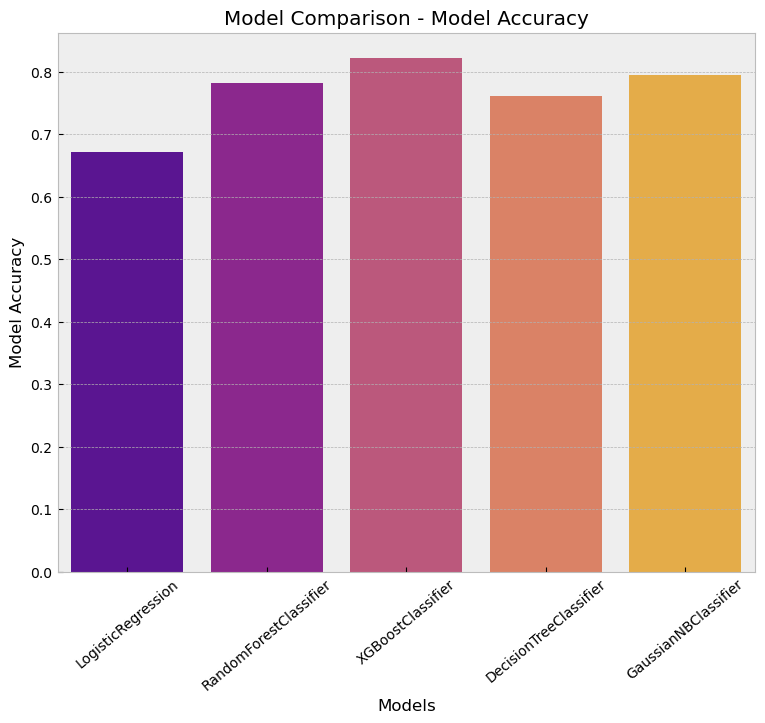

In [54]:
plt.style.use("bmh")
x = ["LogisticRegression", "RandomForestClassifier",
     "XGBoostClassifier", "DecisionTreeClassifier", 
     "GaussianNBClassifier"
     ]

y = [LogisticRegressionScore, RandomForestClassifierScore,
     XGBoostClassifierScore, DecisionTreeClassifierScore,
     GaussianNBScore
    ]

fig, ax = plt.subplots(figsize=(9,7))
sns.barplot(x=x,y=y, palette="plasma");
plt.xlabel("Models")
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy");

In [55]:
LogisticRegressionScore=lr.score(X_test,y_test)
RandomForestClassifierScore=rsc.score(X_test,y_test)
XGBoostClassifierScore=xg.score(X_test, y_test)
DecisionTreeClassifierScore=dt.score(X_test,y_test)
GaussianNBScore=nb.score(X_test, y_test)

models = pd.DataFrame({
    'Model': ["LogisticRegression", "Random Forest Classifier", "XgBoost Classifier", 
              "Decision Tree Classifier", "GaussianNB Classifier"],
    'Score': [LogisticRegressionScore, RandomForestClassifierScore, XGBoostClassifierScore, 
              DecisionTreeClassifierScore, GaussianNBScore]
})

# Sort the DataFrame by 'Score' in descending order
sorted_models = models.sort_values(by="Score", ascending=False)

print(sorted_models)

                      Model     Score
2        XgBoost Classifier  0.821608
4     GaussianNB Classifier  0.793970
1  Random Forest Classifier  0.773869
3  Decision Tree Classifier  0.761307
0        LogisticRegression  0.670854


<h1 style="background-color: #0077b6; padding: 12px;">Conclusion
</h1>


**In addition to an overall accuracy score, the summary report contains metrics for each class, including support, F1-score, precision, and recall. These are all standard performance indicators in machine learning that are used to assess how well categorization models work.**

**Precision: It can be calculated as the percentage of all positive forecasts that are actually positive.**

**Recall: Calculates the percentage of real positive cases that correspond to true positive forecasts.**

**F1-score: A single score that sums up the performance of the model, calculated as a weighted average of precision and recall.**

**Support: The quantity of real cases in each categorization problem class.**

**Accuracy score: Indicates what percentage of the model's total predictions were accurate.**

**In summary, we conducted a comparative analysis of five distinct classification models: Logistic Regression (LR), Decison Tree (DT), Random Forest (RF), XGBoost (XG), and Naive Bayes (NB). Our findings showed that XGBoost produced the highest accuracy score of _82%_, making it the model of choice for future research.**

**The accuracy of the model may be further increased in the future by examining more sophisticated modeling methods like deep learning or by looking into other model components like parameter adjustment or algorithm selection.**


<h1 style="background-color: #0077b6; padding: 12px;">Recommendation
</h1>

**The business team should analyze data to identify trends and insights for travel insurance plans and marketing strategies. They should analyze consumer decision-making variables and predict customer purchase. Regularly monitoring and retraining machine learning models is crucial for effective promotion. Customized campaigns can increase marketing efficiency and return on investment.**

**According to the results, there's an opportunity to convert some non-buyers into subscribers by implementing the following suggestions:**

**Price Adjustment for Affordability -  Consider revising the pricing structure of the travel insurance package to cater to customers with an annual income under 12,50,000 INR. This adjustment can enhance affordability and potentially attract more buyers.**

**Introduction of Tiered Premiums - Explore the option of introducing an additional tiered pricing structure. This can involve creating tiers with lower premiums that are proportionate to claimable amounts. This approach provides flexibility and appeals to customers with varying coverage needs.**

**Chronic Disease Add-On - Evaluate the feasibility of offering Chronic Disease coverage as an add-on feature with a separate premium. This targeted addition can address the specific health concerns of customers and provide a valuable option for those seeking comprehensive coverage.**

**Family Tier Discount - Consider the introduction of a family tier that offers coverage for up to five family members at a discounted rate. This family-oriented approach not only promotes inclusivity but also provides an economic incentive for families to opt for travel insurance as a collective unit.**

**By implementing these recommendations, the company can potentially attract a broader customer base, meet specific needs, and enhance the overall appeal of the travel insurance offerings.**

